## Data Import

In [1]:
import pandas as pd

# import data from data/ directory
df_train = pd.read_csv('data/train.csv')
df_store = pd.read_csv('data/store.csv')

/tmp/ipykernel_8535/2879780261.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('data/train.csv')


## Data overview

In [2]:
df_train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
958896,782,5,2013-02-22,4703,442,1,1,0,0
604317,773,1,2014-01-06,6943,870,1,1,0,1
281138,972,5,2014-11-14,3951,431,1,1,0,0
65171,502,3,2015-06-03,13400,1790,1,1,0,0
807261,787,1,2013-07-08,9206,1124,1,0,0,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
# check for missing values
df_train.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

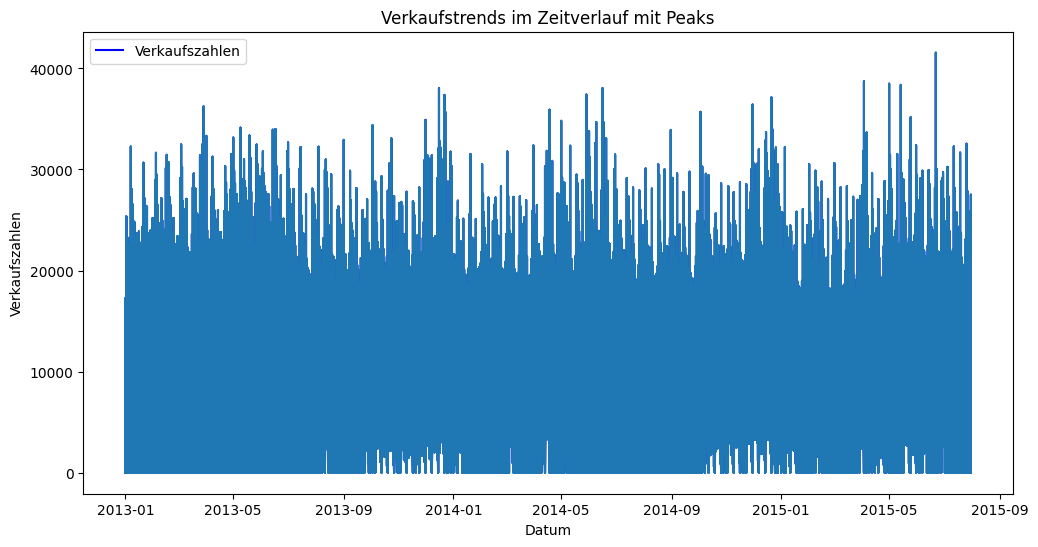

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Die Spalte 'Date' ist im datetime-Format
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Verkaufstrends im Zeitverlauf plotten
plt.figure(figsize=(12, 6))
plt.plot(df_train['Date'], df_train['Sales'], label='Verkaufszahlen', color='blue')

# Peaks markieren
plt.plot(df_train['Date'], df_train['Sales'])

plt.title('Verkaufstrends im Zeitverlauf mit Peaks')
plt.xlabel('Datum')
plt.ylabel('Verkaufszahlen')
plt.legend()
plt.show()


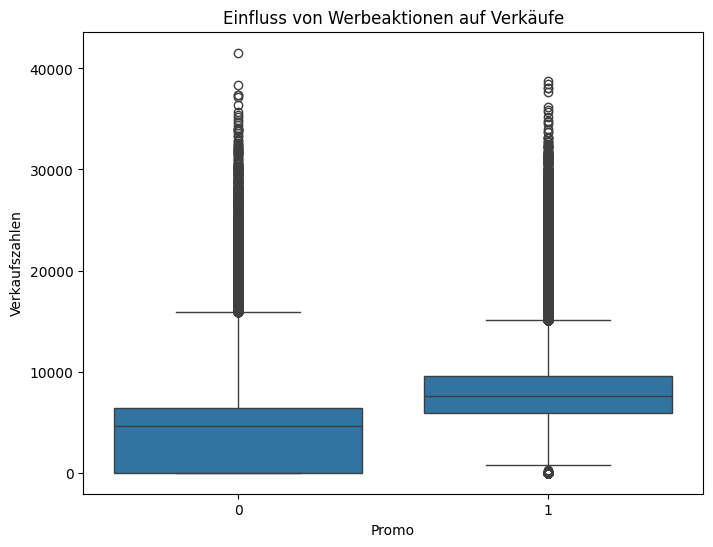

In [6]:
import seaborn as sns

# Boxplot zur Visualisierung des Einflusses von Werbeaktionen auf Verkäufe
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['Promo'], y=df_train['Sales'])
plt.title('Einfluss von Werbeaktionen auf Verkäufe')
plt.xlabel('Promo')
plt.ylabel('Verkaufszahlen')
plt.show()


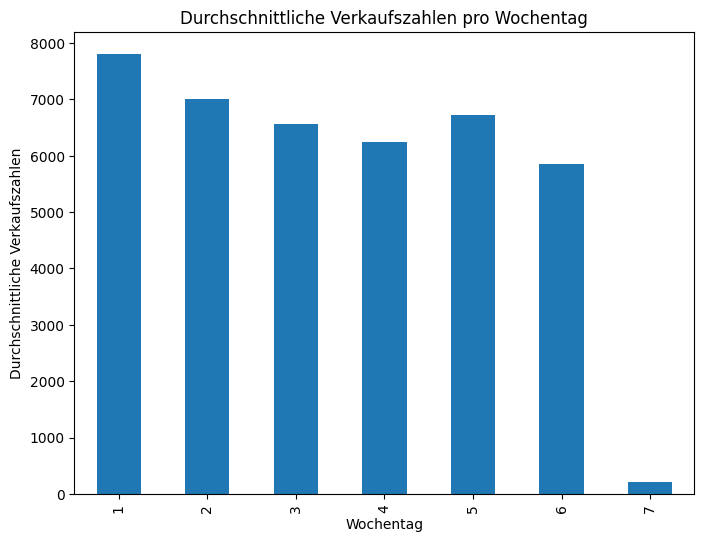

In [7]:
# Durchschnittliche Verkaufszahlen pro Wochentag
average_sales_per_day = df_train.groupby('DayOfWeek')['Sales'].mean()

# Balkendiagramm zur Visualisierung der durchschnittlichen Verkaufszahlen pro Wochentag
plt.figure(figsize=(8, 6))
average_sales_per_day.plot(kind='bar')
plt.title('Durchschnittliche Verkaufszahlen pro Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittliche Verkaufszahlen')
plt.show()


In [8]:
df_trainstore = pd.merge(df_train, df_store, on='Store')

df_trainstore

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
